In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import graphviz
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error


import os


In [ ]:
Bangalore=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Bangalore_1990_2022_BangaloreCity.csv')
Chennai=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Chennai_1990_2022_Madras.csv')
Delhi=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Delhi_NCR_1990_2022_Safdarjung.csv')
Lucknow=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Lucknow_1990_2022.csv')
Mumbai=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Mumbai_1990_2022_Santacruz.csv')
Rajasthan=pd.read_csv('/content/drive/MyDrive/Weather forecasting/Rajasthan_1990_2022_Jodhpur.csv')
Bhubhneshwar=pd.read_csv('/content/drive/MyDrive/Weather forecasting/weather_Bhubhneshwar_1990_2022.csv')
Rourkela=pd.read_csv('/content/drive/MyDrive/Weather forecasting/weather_Rourkela_2021_2022.csv')

In [ ]:
Bangalore

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [ ]:
Bangalore['city-Name'] = 'Bangalore'
Chennai['city-Name'] = 'Chennai'
Delhi['city-Name'] = 'Delhi'
Lucknow['city-Name'] = 'Lucknow'
Mumbai['city-Name'] = 'Mumbai'
Rajasthan['city-Name'] = 'Rajasthan'
Bhubhneshwar['city-Name'] = 'Bhubhneshwar'
Rourkela['city-Name'] = 'Rourkela'

In [ ]:
Lucknow

,time,tavg,tmin,tmax,prcp,city-Name
0,01-01-1990,7.2,NaN,18.1,0.0,Lucknow
1,02-01-1990,10.5,NaN,17.2,0.0,Lucknow
2,03-01-1990,10.2,1.8,18.6,NaN,Lucknow
3,04-01-1990,9.1,NaN,19.3,0.0,Lucknow
4,05-01-1990,13.5,NaN,23.8,0.0,Lucknow
...,...,...,...,...,...,...
11889,21-07-2022,27.4,25.1,33.1,27.3,Lucknow
11890,22-07-2022,28.1,26.1,31.1,16.0,Lucknow
11891,23-07-2022,30.3,26.2,34.7,11.9,Lucknow
11892,24-07-2022,30.0,28.1,34.7,2.0,Lucknow


In [ ]:
Mumbai

,time,tavg,tmin,tmax,prcp,city-Name
0,01-01-1990,23.2,17.0,NaN,0.0,Mumbai
1,02-01-1990,22.2,16.5,29.9,0.0,Mumbai
2,03-01-1990,21.8,16.3,30.7,0.0,Mumbai
3,04-01-1990,25.4,17.9,31.8,0.0,Mumbai
4,05-01-1990,26.5,19.3,33.7,0.0,Mumbai
...,...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9,Mumbai
11890,22-07-2022,28.3,26.0,30.5,3.0,Mumbai
11891,23-07-2022,28.2,25.8,31.3,5.1,Mumbai
11892,24-07-2022,28.1,25.6,30.4,7.1,Mumbai


In [ ]:
Rajasthan

,time,tavg,tmin,tmax,prcp,city-Name
0,01-01-1990,22.9,19.1,28.4,NaN,Rajasthan
1,02-01-1990,21.7,NaN,26.5,0.0,Rajasthan
2,03-01-1990,21.0,16.4,26.5,0.0,Rajasthan
3,04-01-1990,20.8,NaN,27.4,0.0,Rajasthan
4,05-01-1990,20.4,14.2,26.1,0.0,Rajasthan
...,...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5,Rajasthan
11890,22-07-2022,23.2,21.1,27.9,0.0,Rajasthan
11891,23-07-2022,23.1,20.9,26.7,0.0,Rajasthan
11892,24-07-2022,22.8,20.0,26.7,0.3,Rajasthan


In [ ]:
Bhubhneshwar

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city-Name
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
...,...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN,Bhubhneshwar
11931,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN,Bhubhneshwar
11932,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN,Bhubhneshwar
11933,2022-09-03,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN,Bhubhneshwar


In [ ]:
Bhubhneshwar.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [ ]:
Bhubhneshwar


,time,tavg,tmin,tmax,prcp,city-Name
0,1990-01-01,20.1,NaN,28.0,0.0,Bhubhneshwar
1,1990-01-02,20.7,16.4,NaN,0.0,Bhubhneshwar
2,1990-01-03,20.7,16.0,27.4,0.0,Bhubhneshwar
3,1990-01-04,18.8,NaN,28.0,0.0,Bhubhneshwar
4,1990-01-05,19.8,11.0,28.2,0.0,Bhubhneshwar
...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,Bhubhneshwar
11931,2022-09-01,29.6,27.0,33.0,2.1,Bhubhneshwar
11932,2022-09-02,29.7,26.3,33.0,3.3,Bhubhneshwar
11933,2022-09-03,29.2,26.1,34.0,9.7,Bhubhneshwar


In [ ]:
Rourkela.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [ ]:
Rourkela

,time,tavg,tmin,tmax,prcp,city-Name
0,2021-07-06,29.3,26.2,32.6,NaN,Rourkela
1,2021-07-07,29.7,27.3,33.4,11.1,Rourkela
2,2021-07-08,27.4,25.8,29.7,66.9,Rourkela
3,2021-07-09,28.5,26.1,32.1,11.4,Rourkela
4,2021-07-10,29.0,26.2,32.6,2.7,Rourkela
...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela
422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela
423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela
424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela


In [ ]:
Delhi

,time,tavg,tmin,tmax,prcp,city-Name
0,01-01-1990,9.4,6.0,15.1,0.0,Delhi
1,02-01-1990,9.3,5.2,14.2,0.0,Delhi
2,03-01-1990,9.0,6.5,13.6,0.0,Delhi
3,04-01-1990,10.7,6.0,17.5,0.0,Delhi
4,05-01-1990,12.6,7.3,20.8,0.0,Delhi
...,...,...,...,...,...,...
11889,21-07-2022,28.6,26.8,30.6,21.2,Delhi
11890,22-07-2022,29.3,27.0,32.9,0.3,Delhi
11891,23-07-2022,30.1,25.5,34.9,8.9,Delhi
11892,24-07-2022,30.6,27.1,35.7,0.0,Delhi


In [ ]:
Chennai


,time,tavg,tmin,tmax,prcp,city-Name
0,01-01-1990,25.2,22.8,28.4,0.5,Chennai
1,02-01-1990,24.9,21.7,29.1,0.0,Chennai
2,03-01-1990,25.6,21.4,29.8,0.0,Chennai
3,04-01-1990,25.7,NaN,28.7,0.0,Chennai
4,05-01-1990,25.5,20.7,28.4,0.0,Chennai
...,...,...,...,...,...,...
11889,21-07-2022,28.4,24.5,32.8,21.1,Chennai
11890,22-07-2022,27.8,24.6,32.2,22.1,Chennai
11891,23-07-2022,27.4,24.7,32.6,18.6,Chennai
11892,24-07-2022,27.8,25.0,33.3,9.1,Chennai


In [ ]:
def clean(df):
   df['prcp'] = df['prcp'].ffill()
   df['tmin'] = df['tmin'].ffill()
   df['tmax'] = df['tmax'].ffill()
   return df

In [ ]:
Chennai=clean(Chennai)
Bangalore=clean(Bangalore)
Delhi=clean(Delhi)
Lucknow=clean(Lucknow)
Mumbai=clean(Mumbai)
Rajasthan=clean(Rajasthan)
Bhubhneshwar=clean(Bhubhneshwar)
Rourkela=clean(Rourkela)

In [ ]:
Chennai['target']=Chennai.shift(-1)['tmax']
Bangalore['target']=Bangalore.shift(-1)['tmax']
Delhi['target']=Delhi.shift(-1)['tmax']
Lucknow['target']=Lucknow.shift(-1)['tmax']
Mumbai['target']=Mumbai.shift(-1)['tmax']
Rajasthan['target']=Rajasthan.shift(-1)['tmax']
Bhubhneshwar['target']=Bhubhneshwar.shift(-1)['tmax']
Rourkela['target']=Rourkela.shift(-1)['tmax']


In [ ]:
Rajasthan.isnull().sum()

,0
time,0
tavg,70
tmin,0
tmax,0
prcp,1
city-Name,0
target,1


In [ ]:
frames = [Chennai, Bangalore,Delhi,Lucknow,Mumbai,Rajasthan,Bhubhneshwar,Rourkela]
df = pd.concat(frames)

In [ ]:
df

,time,tavg,tmin,tmax,prcp,city-Name,target
0,01-01-1990,25.2,22.8,28.4,0.5,Chennai,29.1
1,02-01-1990,24.9,21.7,29.1,0.0,Chennai,29.8
2,03-01-1990,25.6,21.4,29.8,0.0,Chennai,28.7
3,04-01-1990,25.7,21.4,28.7,0.0,Chennai,28.4
4,05-01-1990,25.5,20.7,28.4,0.0,Chennai,26.1
...,...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8


In [ ]:
Rourkela

,time,tavg,tmin,tmax,prcp,city-Name,target
0,2021-07-06,29.3,26.2,32.6,NaN,Rourkela,33.4
1,2021-07-07,29.7,27.3,33.4,11.1,Rourkela,29.7
2,2021-07-08,27.4,25.8,29.7,66.9,Rourkela,32.1
3,2021-07-09,28.5,26.1,32.1,11.4,Rourkela,32.6
4,2021-07-10,29.0,26.2,32.6,2.7,Rourkela,33.7
...,...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8


In [ ]:
df.shape

(83725, 7)

In [ ]:
df.isnull().sum()

,0
time,0
tavg,490
tmin,3
tmax,1
prcp,3
city-Name,0
target,8


In [ ]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425],
      dtype='int64', length=83725)

In [ ]:
df.head()

,time,tavg,tmin,tmax,prcp,city-Name,target
0,01-01-1990,25.2,22.8,28.4,0.5,Chennai,29.1
1,02-01-1990,24.9,21.7,29.1,0.0,Chennai,29.8
2,03-01-1990,25.6,21.4,29.8,0.0,Chennai,28.7
3,04-01-1990,25.7,21.4,28.7,0.0,Chennai,28.4
4,05-01-1990,25.5,20.7,28.4,0.0,Chennai,26.1


In [ ]:
df.tail()

,time,tavg,tmin,tmax,prcp,city-Name,target
421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8
425,2022-09-04,28.2,25.9,31.8,17.7,Rourkela,NaN


In [ ]:
df.isnull().sum()

,0
time,0
tavg,490
tmin,3
tmax,1
prcp,3
city-Name,0
target,8


In [ ]:
df.reset_index()

,index,time,tavg,tmin,tmax,prcp,city-Name,target
0,0,01-01-1990,25.2,22.8,28.4,0.5,Chennai,29.1
1,1,02-01-1990,24.9,21.7,29.1,0.0,Chennai,29.8
2,2,03-01-1990,25.6,21.4,29.8,0.0,Chennai,28.7
3,3,04-01-1990,25.7,21.4,28.7,0.0,Chennai,28.4
4,4,05-01-1990,25.5,20.7,28.4,0.0,Chennai,26.1
...,...,...,...,...,...,...,...,...
83720,421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
83721,422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
83722,423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
83723,424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8


By mapping city names to numbers, the data becomes suitable for algorithms.

In [ ]:
df['city-Name']=df['city-Name'].map({'Chennai': '0', 'Bangalore': '1','Delhi':'2','Lucknow':'3','Mumbai':'4','Rajasthan':'5','Bhubhneshwar':'6','Rourkela':'7'})

In [ ]:
df


,time,tavg,tmin,tmax,prcp,city-Name,target
0,01-01-1990,25.2,22.8,28.4,0.5,0,29.1
1,02-01-1990,24.9,21.7,29.1,0.0,0,29.8
2,03-01-1990,25.6,21.4,29.8,0.0,0,28.7
3,04-01-1990,25.7,21.4,28.7,0.0,0,28.4
4,05-01-1990,25.5,20.7,28.4,0.0,0,26.1
...,...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,7,33.2
422,2022-09-01,29.1,25.7,33.2,11.5,7,33.7
423,2022-09-02,29.4,26.4,33.7,1.5,7,32.6
424,2022-09-03,28.7,26.6,32.6,8.0,7,31.8


In [ ]:
df.dtypes

,0
time,object
tavg,float64
tmin,float64
tmax,float64
prcp,float64
city-Name,object
target,float64


In [ ]:
df.set_index('time',inplace=True)

In [ ]:
df.sort_values(by='time')

,tavg,tmin,tmax,prcp,city-Name,target
time,,,,,,
01-01-1990,25.2,22.8,28.4,0.5,0,29.1
01-01-1990,7.2,NaN,18.1,0.0,3,17.2
01-01-1990,23.2,17.0,NaN,0.0,4,29.9
01-01-1990,22.9,19.1,28.4,NaN,1,26.5
01-01-1990,22.9,19.1,28.4,NaN,5,26.5
...,...,...,...,...,...,...
31-12-2021,20.3,17.6,26.5,0.0,5,24.6
31-12-2021,13.9,12.1,20.5,0.0,3,20.7
31-12-2021,10.9,4.6,18.2,0.0,2,20.0


In [ ]:
df.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
       '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04'],
      dtype='object', name='time', length=83725)

In [ ]:
print(df.index[:20])

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       '11-01-1990', '12-01-1990', '13-01-1990', '14-01-1990', '15-01-1990',
       '16-01-1990', '17-01-1990', '18-01-1990', '19-01-1990', '20-01-1990'],
      dtype='object', name='time')


In [ ]:
df.index = pd.to_datetime(df.index, format='mixed', errors='coerce')

In [ ]:
df['city-Name']=df['city-Name'].astype(str).astype(int)

In [ ]:
df.index.year

Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='time', length=83725)

In [ ]:
df.isnull().sum()

,0
tavg,490
tmin,3
tmax,1
prcp,3
city-Name,0
target,8


In [ ]:
df.head()

,tavg,tmin,tmax,prcp,city-Name,target
time,,,,,,
1990-01-01,25.2,22.8,28.4,0.5,0,29.1
1990-02-01,24.9,21.7,29.1,0.0,0,29.8
1990-03-01,25.6,21.4,29.8,0.0,0,28.7
1990-04-01,25.7,21.4,28.7,0.0,0,28.4
1990-05-01,25.5,20.7,28.4,0.0,0,26.1


<Axes: xlabel='time'>

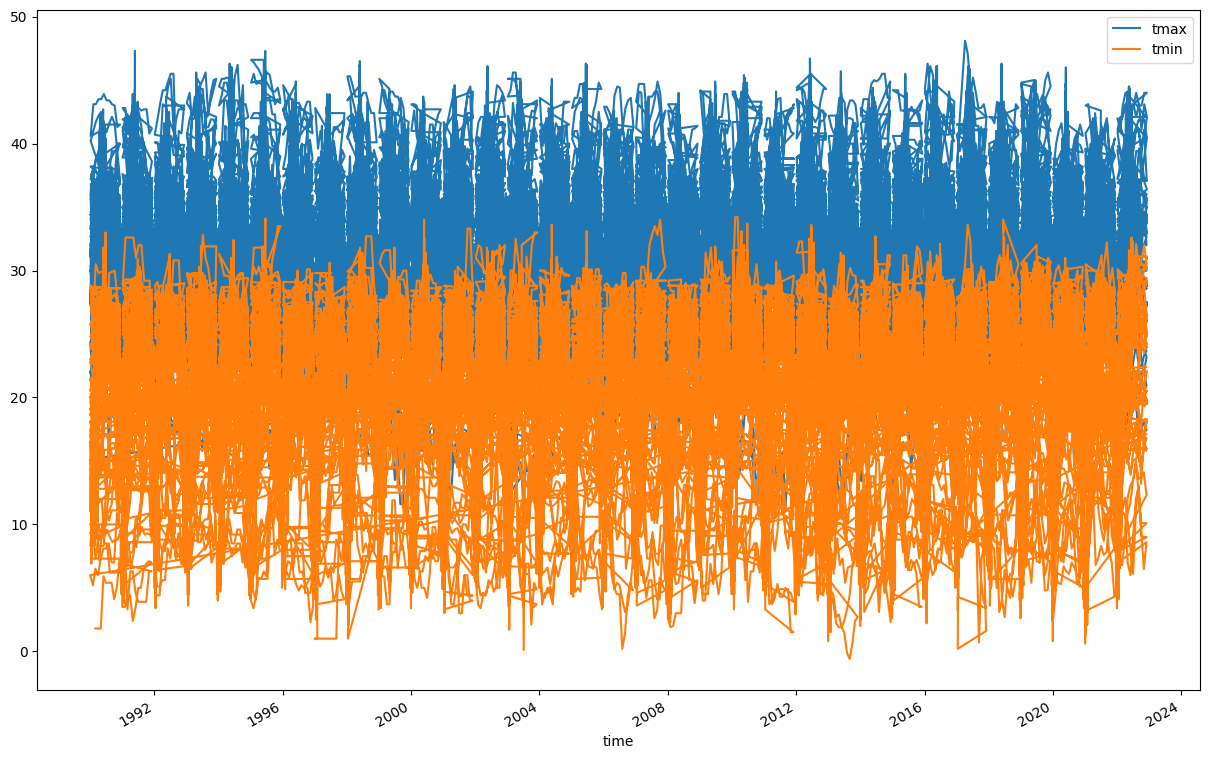

In [ ]:
df[['tmax','tmin']].plot(figsize=(15,10))

<Axes: xlabel='time'>

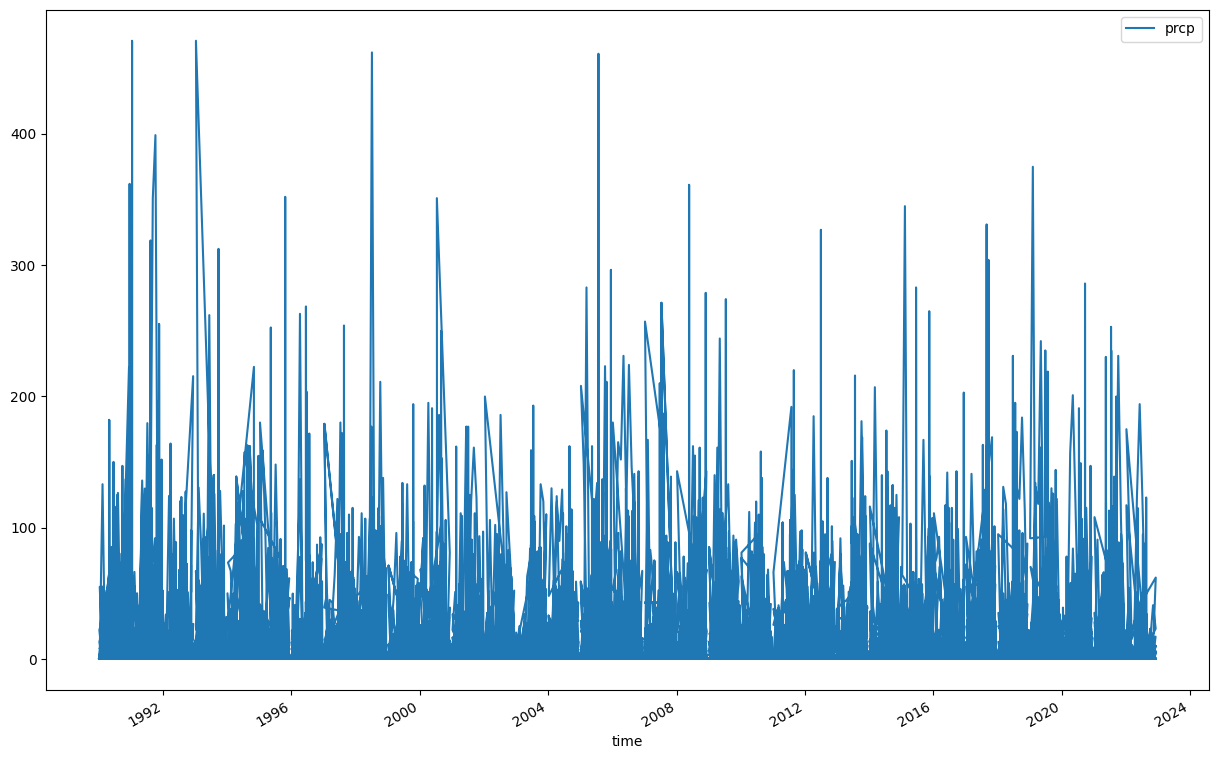

In [ ]:
df[['prcp']].plot(figsize=(15,10))

<Axes: xlabel='time'>

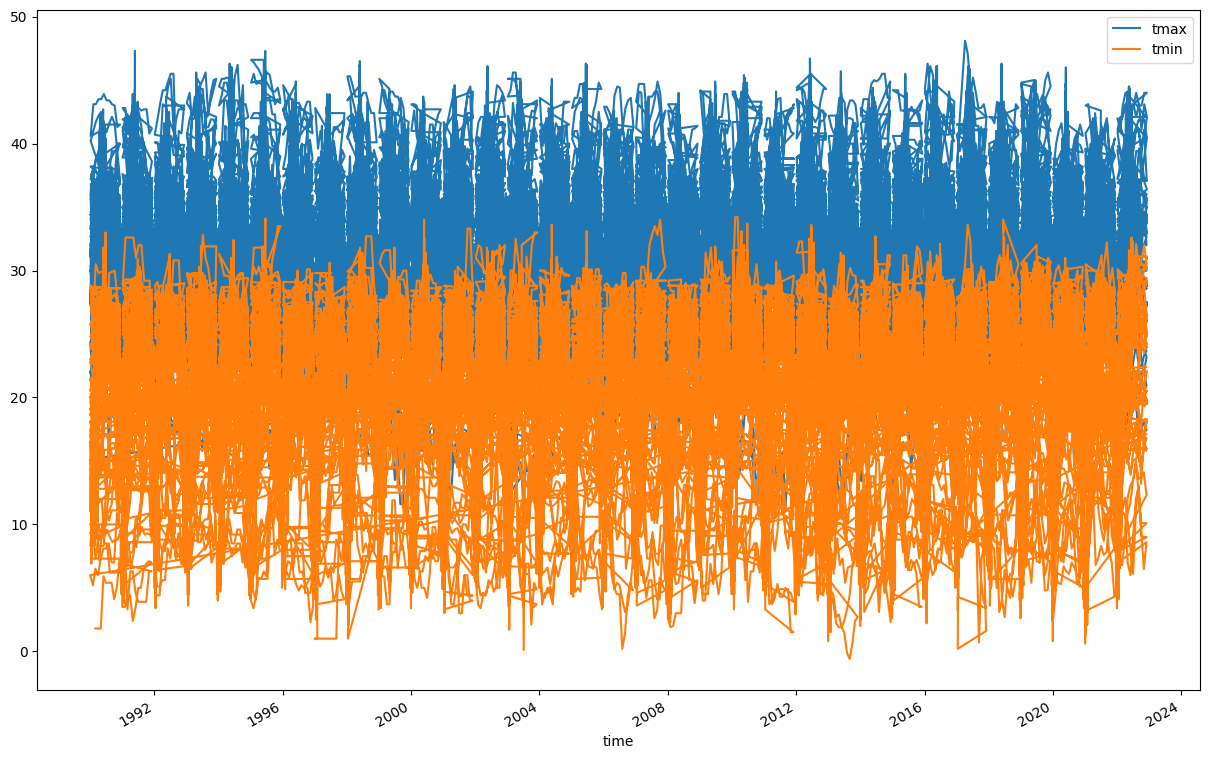

In [ ]:
df[['tmax','tmin']].plot(figsize=(15,10))

In [ ]:
df=df.iloc[:-1,:].copy()

In [ ]:
df

,tavg,tmin,tmax,prcp,city-Name,target
time,,,,,,
1990-01-01,25.2,22.8,28.4,0.5,0,29.1
1990-02-01,24.9,21.7,29.1,0.0,0,29.8
1990-03-01,25.6,21.4,29.8,0.0,0,28.7
1990-04-01,25.7,21.4,28.7,0.0,0,28.4
1990-05-01,25.5,20.7,28.4,0.0,0,26.1
...,...,...,...,...,...,...
2022-08-30,29.8,26.4,34.3,0.0,7,33.5
2022-08-31,29.0,26.6,33.5,2.0,7,33.2
2022-09-01,29.1,25.7,33.2,11.5,7,33.7


In [ ]:
df.drop(['tavg'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
tmin,0
tmax,0
prcp,0
city-Name,0
target,0


In [ ]:
df = df.sort_index()

In [ ]:
print(df.index.is_monotonic_increasing)  # Check if the index is sorted
print(df.index)

True
DatetimeIndex(['1990-01-01', '1990-01-01', '1990-01-02', '1990-01-02',
               '1990-01-02', '1990-01-02', '1990-01-02', '1990-01-02',
               '1990-01-02', '1990-01-03',
               ...
               '2022-12-06', '2022-12-06', '2022-12-06', '2022-12-06',
               '2022-12-07', '2022-12-07', '2022-12-07', '2022-12-07',
               '2022-12-07', '2022-12-07'],
              dtype='datetime64[ns]', name='time', length=83710, freq=None)


In [ ]:
train=df.loc[:'2022-09-03']
test=df.loc['2020-01-01':]

In [ ]:
train

,tmin,tmax,prcp,city-Name,target
time,,,,,
1990-01-01,22.8,28.4,0.5,0,29.1
1990-01-01,6.0,15.1,0.0,2,14.2
1990-01-02,13.5,31.6,0.0,5,31.9
1990-01-02,17.5,31.1,0.0,4,31.1
1990-01-02,9.3,24.3,0.0,2,21.2
...,...,...,...,...,...
2022-09-03,16.7,32.8,0.0,5,32.8
2022-09-03,26.6,32.6,8.0,7,31.8
2022-09-03,26.0,37.2,0.1,4,36.6


In [ ]:
test

,tmin,tmax,prcp,city-Name,target
time,,,,,
2020-01-01,2.4,20.2,0.0,2,22.0
2020-01-01,15.0,28.6,0.0,4,28.0
2020-01-01,4.1,16.5,0.0,3,23.5
2020-01-01,22.5,30.3,27.9,0,31.0
2020-01-01,19.2,27.2,0.0,5,27.8
...,...,...,...,...,...
2022-12-07,19.8,27.5,4.6,1,27.5
2022-12-07,31.1,37.1,0.5,3,37.1
2022-12-07,23.9,29.0,62.0,4,28.0


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg = Ridge(alpha=.1)
predictors = ["prcp", "tmax", "tmin","city-Name"]

In [ ]:
train[predictors]

,prcp,tmax,tmin,city-Name
time,,,,
1990-01-01,0.5,28.4,22.8,0
1990-01-01,0.0,15.1,6.0,2
1990-01-02,0.0,31.6,13.5,5
1990-01-02,0.0,31.1,17.5,4
1990-01-02,0.0,24.3,9.3,2
...,...,...,...,...
2022-09-03,0.0,32.8,16.7,5
2022-09-03,8.0,32.6,26.6,7
2022-09-03,0.1,37.2,26.0,4


In [ ]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Training performance
train_predictions = reg.predict(train[predictors])
train_mse = mean_squared_error(train["target"], train_predictions)
train_r2 = r2_score(train["target"], train_predictions)

# Validation/Test performance
test_predictions = reg.predict(test[predictors])
test_mse = mean_squared_error(test["target"], test_predictions)
test_r2 = r2_score(test["target"], test_predictions)

print("Training MSE:", train_mse)
print("Validation/Test MSE:", test_mse)
print("Training R²:", train_r2)
print("Validation/Test R²:", test_r2)


Training MSE: 2.2985468381482295
Validation/Test MSE: 2.1873394439830514
Training R²: 0.8903075944047838
Validation/Test R²: 0.8961449814311852


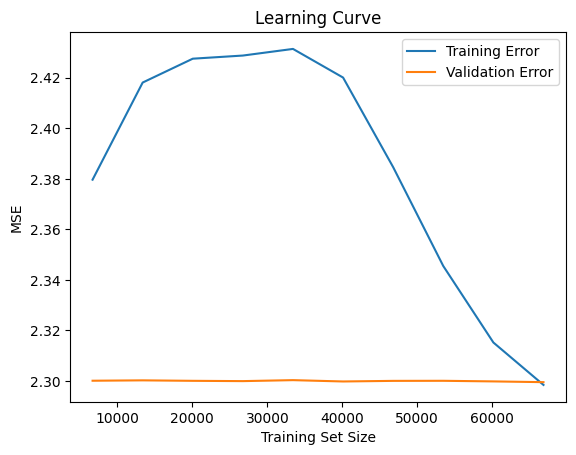

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    reg, train[predictors], train["target"], cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, test_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
time,,
2020-01-01,22.0,20.482416
2020-01-01,28.0,28.640052
2020-01-01,23.5,17.189435
2020-01-01,31.0,30.582810
2020-01-01,27.8,27.542436
...,...,...
2022-12-07,27.5,27.865603
2022-12-07,37.1,37.048601
2022-12-07,28.0,29.528133


,actual,predictions
time,,
2020-01-01,22.0,20.482416
2020-01-01,28.0,28.640052
2020-01-01,23.5,17.189435
2020-01-01,31.0,30.582810
2020-01-01,27.8,27.542436
...,...,...
2022-12-07,27.5,27.865603
2022-12-07,37.1,37.048601
2022-12-07,28.0,29.528133


<Axes: xlabel='time'>

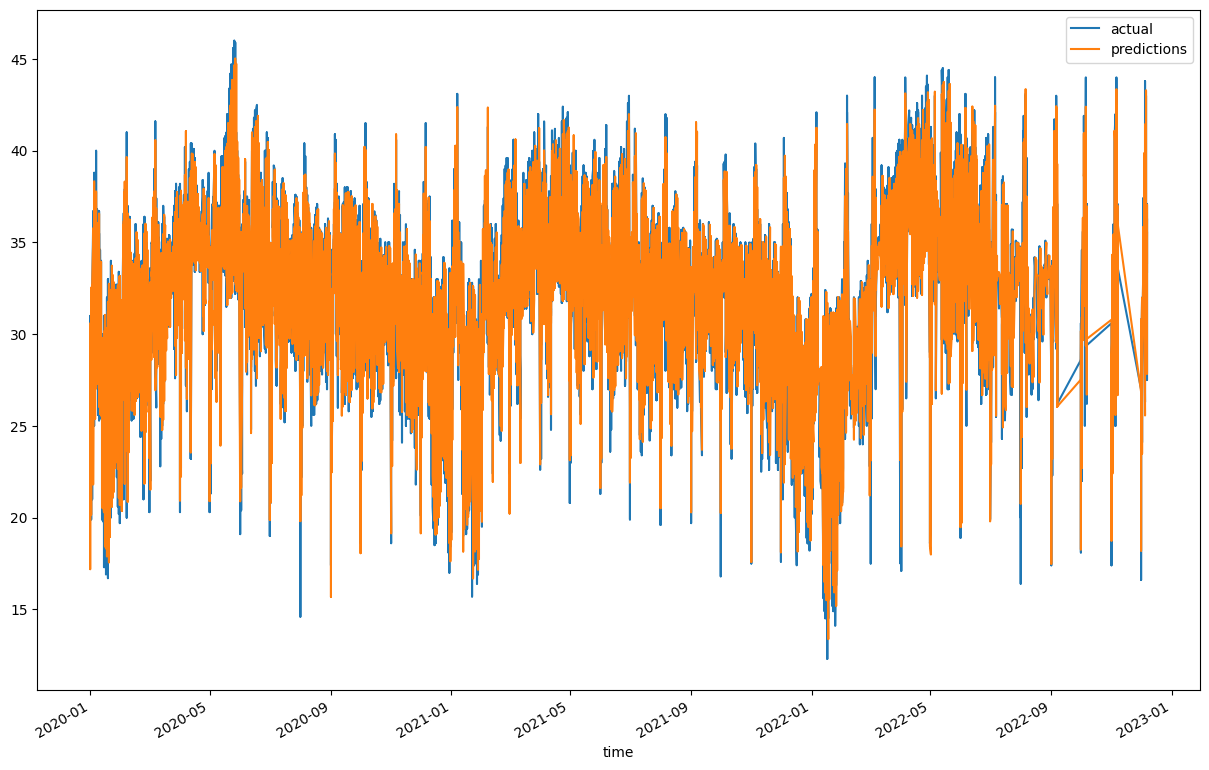

In [ ]:
combined.plot(figsize=(15,10))

In [ ]:
data = {
  "prcp": [0 , 0, 0, 0 ,0 ,0,0, 0.01,0,0,0,0,0],
  "tmax": [37,45,50,52,48,45,43,41,40,41,41,37,39],
    "tmin":[27,30,39,45,40,36,41,39,34,36,33,35,32],
    "city-Name":[0 , 1, 5, 0 ,0 ,4,1, 3,0,4,7,2,2]
}


In [ ]:
df = pd.DataFrame(data)
df

,prcp,tmax,tmin,city-Name
0,0.00,37,27,0
1,0.00,45,30,1
2,0.00,50,39,5
3,0.00,52,45,0
4,0.00,48,40,0
5,0.00,45,36,4
6,0.00,43,41,1
7,0.01,41,39,3
8,0.00,40,34,0
9,0.00,41,36,4


In [ ]:
predictions1 = reg.predict(df)
predictions1

array([36.79365305, 44.18499627, 49.09423469, 51.18305126, 47.3374105 ,
       44.42834878, 42.8337596 , 40.92500971, 39.81548711, 40.79440569,
       40.65670239, 37.12524619, 38.81519914])

In [ ]:
print("Setup Complete")

Setup Complete


In [ ]:
chennai = "/content/drive/MyDrive/Weather forecasting/Chennai_1990_2022_Madras.csv"
bangalore = "/content/drive/MyDrive/Weather forecasting/Bangalore_1990_2022_BangaloreCity.csv"
delhi = "/content/drive/MyDrive/Weather forecasting/Delhi_NCR_1990_2022_Safdarjung.csv"
lucknow = "/content/drive/MyDrive/Weather forecasting/Lucknow_1990_2022.csv"
mumbai = "/content/drive/MyDrive/Weather forecasting/Mumbai_1990_2022_Santacruz.csv"
rajasthan = "/content/drive/MyDrive/Weather forecasting/Rajasthan_1990_2022_Jodhpur.csv"
geolocation = "/content/drive/MyDrive/Weather forecasting/Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv"


In [ ]:
rajasthan_data = pd.read_csv(rajasthan, index_col="time", infer_datetime_format=True)
mumbai_data = pd.read_csv(mumbai, index_col="time", infer_datetime_format=True)


<ipython-input-191-828b5963f716>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  rajasthan_data = pd.read_csv(rajasthan, index_col="time", infer_datetime_format=True)
<ipython-input-191-828b5963f716>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mumbai_data = pd.read_csv(mumbai, index_col="time", infer_datetime_format=True)


In [ ]:
rajasthan_edata = pd.read_csv(rajasthan);
mumbai_edata = pd.read_csv(mumbai);

In [ ]:
print("\nSample Data Of rajasthan\n")

print(rajasthan_data.head())  # 5 data

print("\nMissing Values In The DataSet rajasthan\n")


Sample Data Of rajasthan

            tavg  tmin  tmax  prcp
time                              
01-01-1990  22.9  19.1  28.4   NaN
02-01-1990  21.7   NaN  26.5   0.0
03-01-1990  21.0  16.4  26.5   0.0
04-01-1990  20.8   NaN  27.4   0.0
05-01-1990  20.4  14.2  26.1   0.0

Missing Values In The DataSet rajasthan



In [ ]:
def find_missing(ds):
    mis_val = ds.isnull().sum()

    mis_val_percent = 100 * ds.isnull().sum() / len(ds)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values Count', 1: '% of Total Missing Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)

    print("\nYour selected dataframe has " + str(ds.shape[1]) + " columns.\n"
                                                                "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [ ]:
missing_values_rajasthan = find_missing(rajasthan_data)
print(missing_values_rajasthan)



Your selected dataframe has 4 columns.
There are 4 columns that have missing values.
      Missing Values Count  % of Total Missing Values
prcp                  4620                       38.8
tmin                  1389                       11.7
tmax                   629                        5.3
tavg                    70                        0.6


In [ ]:
rajasthan_data_copy = rajasthan_data.copy(deep=True)

In [ ]:
print("\n Linear Interpolation Missing Data Filling\n")



 Linear Interpolation Missing Data Filling



In [ ]:
rajasthan_data_copy.interpolate(limit_direction="both", inplace=True)
print(rajasthan_data_copy['tmin'][80:100])

time
22-03-1990    21.500000
23-03-1990    22.100000
24-03-1990    21.733333
25-03-1990    21.366667
26-03-1990    21.000000
27-03-1990    21.000000
28-03-1990    22.200000
29-03-1990    23.400000
30-03-1990    23.300000
31-03-1990    22.100000
01-04-1990    23.000000
02-04-1990    23.600000
03-04-1990    23.600000
04-04-1990    22.850000
05-04-1990    22.100000
06-04-1990    20.900000
07-04-1990    21.550000
08-04-1990    22.200000
09-04-1990    22.400000
10-04-1990    23.200000
Name: tmin, dtype: float64


In [ ]:
rajasthan_data_copy['tavg'] = rajasthan_data_copy['tavg'].fillna(0).astype(int)
rajasthan_data_copy['tmin'] = rajasthan_data_copy['tmin'].fillna(0).astype(int)
rajasthan_data_copy['tmax'] = rajasthan_data_copy['tmax'].fillna(0).astype(int)
rajasthan_data_copy['prcp'] = rajasthan_data_copy['prcp'].fillna(0).astype(int)

In [ ]:
print(rajasthan_data_copy.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tavg    11894 non-null  int64
 1   tmin    11894 non-null  int64
 2   tmax    11894 non-null  int64
 3   prcp    11894 non-null  int64
dtypes: int64(4)
memory usage: 464.6+ KB
None


In [ ]:
col_names = ['tavg', 'tmin', 'tmax', 'class']

In [ ]:
rajasthan_data_copy.columns = col_names


In [ ]:
print("\nrajasthan Data Set\n")



rajasthan Data Set



In [ ]:
print(rajasthan_data_copy.head())


            tavg  tmin  tmax  class
time                               
01-01-1990    22    19    28      0
02-01-1990    21    17    26      0
03-01-1990    21    16    26      0
04-01-1990    20    15    27      0
05-01-1990    20    14    26      0


In [ ]:
print(rajasthan_data_copy['class'].value_counts())

class
0      8126
1       751
2       419
3       316
4       231
       ... 
70        1
179       1
122       1
110       1
114       1
Name: count, Length: 113, dtype: int64


In [ ]:
rajasthan_data_copy['class'] = pd.cut(round(rajasthan_data_copy['class'], -1), bins=3, labels=["0", "1", "2"])

tavg_bucket = [20, 24, 28, 32, 36]
tmin_bucket = [12, 16, 20, 24, 28, 31]
tmax_bucket = [23, 27, 31, 35, 39, 44]

In [ ]:
tavg_labels = ['20-24', '24-28', '28-32', '32-36']
tmin_labels = ['12 to 16', '16-20', '20-24', '24-28', '28-31']
tmax_labels = ['23-27', '27-31', '31-35', '35-39', '39-44']

In [ ]:
print(pd.cut(rajasthan_data_copy.tavg, bins=tavg_bucket, labels=tavg_labels, include_lowest=True).value_counts())
print(pd.cut(rajasthan_data_copy.tmin, bins=tmin_bucket, labels=tmin_labels, include_lowest=True).value_counts())
print(pd.cut(rajasthan_data_copy.tmax, bins=tmax_bucket, labels=tmax_labels, include_lowest=True).value_counts())


tavg
20-24    8303
24-28    3047
28-32     216
32-36       0
Name: count, dtype: int64
tmin
16-20       7469
20-24       2461
12 to 16    1924
24-28         21
28-31          0
Name: count, dtype: int64
tmax
27-31    5852
23-27    3014
31-35    2675
35-39     273
39-44       0
Name: count, dtype: int64


In [ ]:
print(rajasthan_data_copy['tavg'].max())
print(rajasthan_data_copy['tmin'].max())
print(rajasthan_data_copy['tmax'].max())
print(rajasthan_data_copy['tavg'].min())
print(rajasthan_data_copy['tmin'].min())
print(rajasthan_data_copy['tmax'].min())

32
27
39
17
9
19


In [ ]:
rajasthan_data_copy.to_csv("chennai_filled.csv")

In [ ]:
# Declare feature vector and target variable

X = rajasthan_data_copy.drop(['class'], axis=1)

y = rajasthan_data_copy['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print("TRAIN DATA SET SIZE AND TEST DATA SET SIZE")
print(X_train.shape, X_test.shape)

TRAIN DATA SET SIZE AND TEST DATA SET SIZE
(9515, 3) (2379, 3)


In [ ]:
encoder = ce.OrdinalEncoder(cols=['tavg', 'tmin', 'tmax'])


In [ ]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [ ]:
print(X_train.head())
print(X_test.head())


            tavg  tmin  tmax
time                        
27-03-1998     1     1     1
08-11-2010     2     2     2
11-03-2009     3     3     3
31-12-1992     2     4     4
17-11-2014     4     2     5
            tavg  tmin  tmax
time                        
17-01-2015     4    10     6
26-09-2000     6     6     6
20-10-2012     4     3     6
11-06-2014    10     7     3
08-04-1992    12     1    15


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

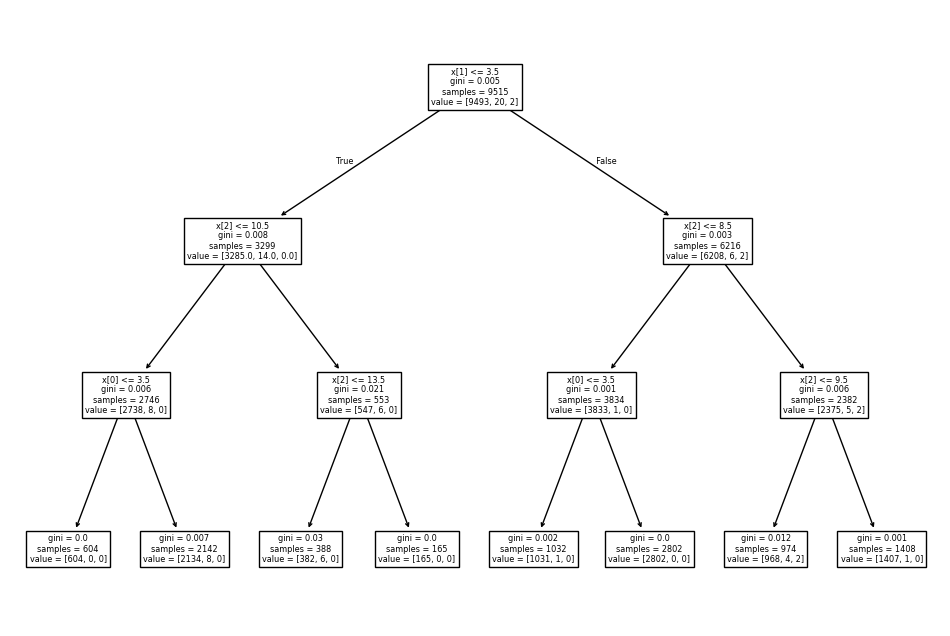

In [ ]:
# fit the model
clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

plt.show()

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

y_pred_train_gini = clf_gini.predict(X_train)


Model accuracy score with criterion gini index: 0.9983


In [ ]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

print("Confusion Matrix")

print(classification_report(y_test, y_pred_gini))

Training-set accuracy score: 0.9977
Training set score: 0.9977
Test set score: 0.9983
Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


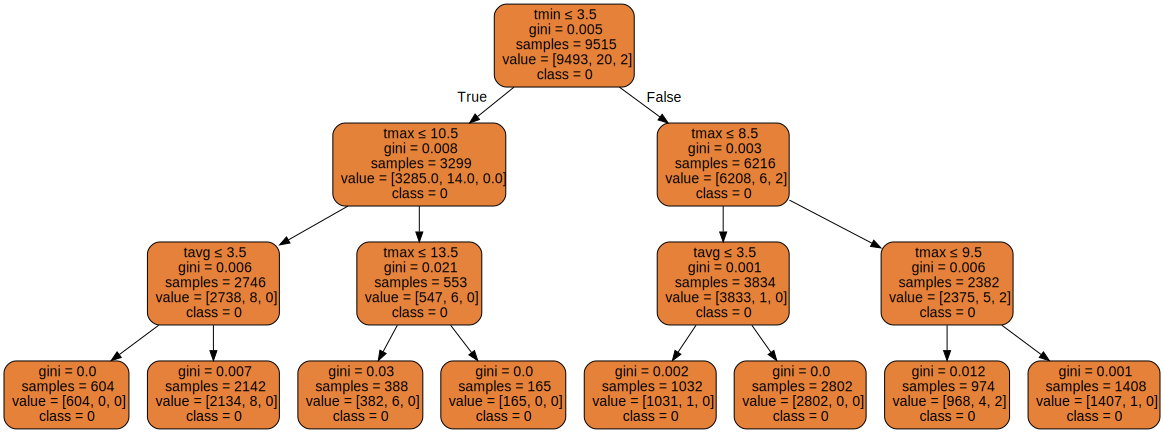

In [ ]:
dot_data = tree.export_graphviz(clf_gini,
                                feature_names=X_train.columns,
                                class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9983


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


Training-set accuracy score: 0.9977
Training set score: 0.9977
Test set score: 0.9983


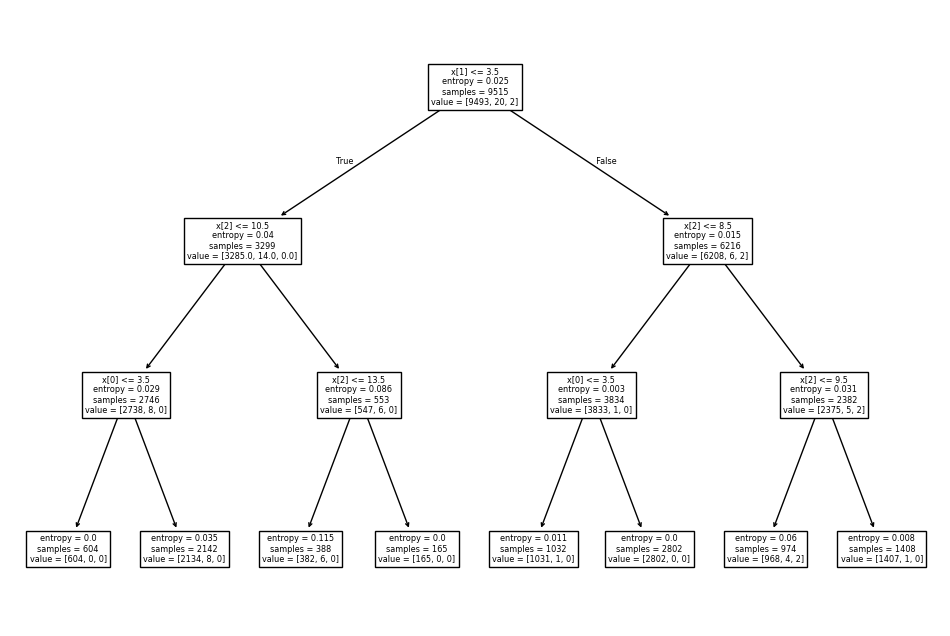

Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
plt.figure(figsize=(12, 8))

tree.plot_tree(clf_en.fit(X_train, y_train))

plt.show()

print("Confusion Matrix")

print(classification_report(y_test, y_pred_en))


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_en)
print(f"Confusion matrix:\n{confusion}")



Confusion matrix:
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]


In [ ]:
# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


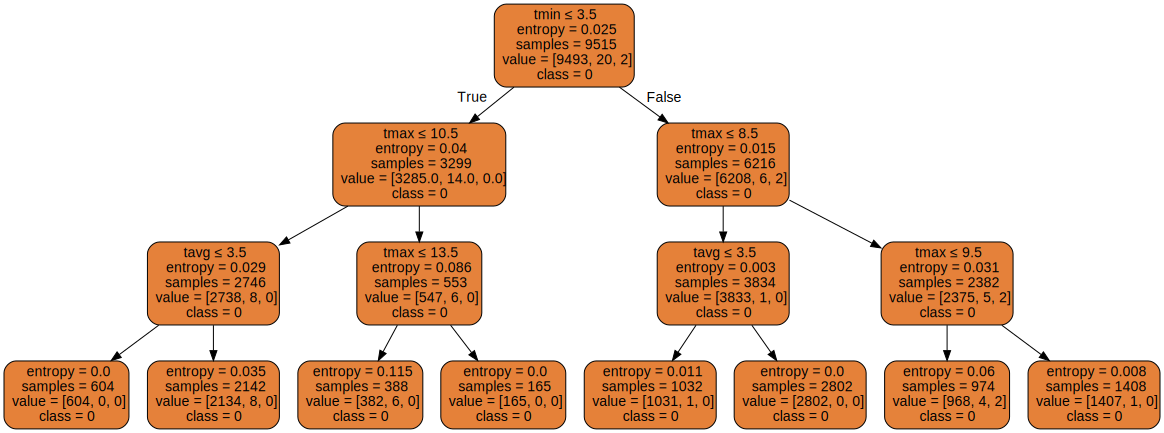

In [ ]:
dot_data = tree.export_graphviz(clf_en,
                                feature_names=X_train.columns,
                                class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
model = KNeighborsClassifier(n_neighbors=13 )

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred = model.predict(X_test)
y_pred_knn = model.predict(X_test)

In [ ]:
print("\n\nK-Nearest Neighbor Accuracy Score: ", (accuracy_score(y_test, y_pred)*100), "%")

print("Confusion Matrix")

print(classification_report(y_test, y_pred_en))

confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")



K-Nearest Neighbor Accuracy Score:  99.83186212694409 %
Confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379

Confusion matrix:
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 1, 1, 0, 2, 2, 0, 1, 2]
cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
            columns = ['Predicted 0', 'Predicted 1', 'Predicted 2'],
            index = ['Actual 0', 'Actual 1', 'Actual 2'])

In [ ]:
import traceback
traceback.print_stack()


  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(s

In [ ]:
def confusion_metrics(conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # Accuracy
    conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))
    # Misclassification error rate
    conf_misclassification = 1 - conf_accuracy
    # Sensitivity (Recall)
    conf_sensitivity = (TP / float(TP + FN))
    # Specificity
    conf_specificity = (TN / float(TN + FP))
    # Precision
    conf_precision = (TP / float(TP + FP))
    # F1 Score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

    print('-' * 50)
    print(f'Accuracy: {round(conf_accuracy, 2)}')
    print(f'Mis-Classification: {round(conf_misclassification, 2)}')
    print(f'Sensitivity: {round(conf_sensitivity, 2)}')
    print(f'Specificity: {round(conf_specificity, 2)}')
    print(f'Precision: {round(conf_precision, 2)}')
    print(f'F1 Score: {round(conf_f1, 2)}')

# Models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree (CART)', DecisionTreeClassifier(criterion='gini')),
    ('Decision Tree (ENTROPY)', DecisionTreeClassifier(criterion='entropy')),
    ('K-NN', KNeighborsClassifier()),
    ('RandomForestClassifier', RandomForestClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("\nConfusion Matrix")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix metrics
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("\nClassifier Measures for", name)
    confusion_metrics(cm)


Logistic Regression
Accuracy: 99.83%

Confusion Matrix
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379


Classifier Measures for Logistic Regression
True Positives: 0
True Negatives: 2375
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

Naive Bayes
Accuracy: 94.28%

Confusion Matrix
[[2243    0  132]
 [   3    0    0]
 [   1    0    0]]

Classification Report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-259-29e36f0c52be>:20: RuntimeWarni

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           0.94      2379
   macro avg       0.33      0.31      0.32      2379
weighted avg       1.00      0.94      0.97      2379


Classifier Measures for Naive Bayes
True Positives: 0
True Negatives: 2243
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

Decision Tree (CART)
Accuracy: 99.83%

Confusion Matrix
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1



<ipython-input-259-29e36f0c52be>:20: RuntimeWarning: invalid value encountered in divide
  conf_precision = (TP / float(TP + FP))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be


Classifier Measures for Decision Tree (CART)
True Positives: 0
True Negatives: 2375
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

Decision Tree (ENTROPY)
Accuracy: 99.83%

Confusion Matrix
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-259-29e36f0c52be>:20: RuntimeWarni



Classifier Measures for Decision Tree (ENTROPY)
True Positives: 0
True Negatives: 2375
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan

K-NN
Accuracy: 99.83%

Confusion Matrix
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379


Classifier Measures for K-NN
True Positives: 0
True Negatives: 2375
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specific

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-259-29e36f0c52be>:20: RuntimeWarni


RandomForestClassifier
Accuracy: 99.83%

Confusion Matrix
[[2375    0    0]
 [   3    0    0]
 [   1    0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1

    accuracy                           1.00      2379
   macro avg       0.33      0.33      0.33      2379
weighted avg       1.00      1.00      1.00      2379


Classifier Measures for RandomForestClassifier
True Positives: 0
True Negatives: 2375
False Positives: 0
False Negatives: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.0
Specificity: 1.0
Precision: nan
F1 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-259-29e36f0c52be>:20: RuntimeWarni

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Load the Rajasthan weather dataset
rajasthan = pd.read_csv("/content/drive/MyDrive/Weather forecasting/Rajasthan_1990_2022_Jodhpur.csv", index_col="time", infer_datetime_format=True)

<ipython-input-261-e6961bedeaaa>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  rajasthan = pd.read_csv("/content/drive/MyDrive/Weather forecasting/Rajasthan_1990_2022_Jodhpur.csv", index_col="time", infer_datetime_format=True)


In [ ]:
rajasthan = rajasthan.interpolate(limit_direction="both")

In [ ]:
rajasthan.index = pd.to_datetime(rajasthan.index, format="%d-%m-%Y", dayfirst=True)


In [ ]:
def predict_weather(date):
    # Create a new DataFrame with the weather data for the given date
    new_data = pd.DataFrame({"tavg": [0], "tmin": [0], "tmax": [0], "prcp": [0]}, index=[date])

    # Concatenate the new data with the existing weather data
    data = pd.concat([rajasthan, new_data])

    # Create a new column with the day of year
    data["day"] = data.index.dayofyear

    # Split the data into training and testing sets
    train_data = data.loc[data.index.year < date.year]
    test_data = data.loc[data.index.year == date.year]

    # Fit a decision tree regressor to the training data
    model = DecisionTreeRegressor(random_state=0)
    X_train = train_data["day"].values.reshape(-1, 1)
    y_train = train_data[["tavg", "tmin", "tmax", "prcp"]].values
    model.fit(X_train, y_train)

    # Use the model to predict the weather for the given date
    X_test = test_data["day"].values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    # Extract the predicted weather conditions from the model output
    tavg_pred = int(y_pred[0][0])
    tmin_pred = int(y_pred[0][1])
    tmax_pred = int(y_pred[0][2])
    prcp_pred = int(y_pred[0][3])

    # Determine whether it will rain or not based on the predicted precipitation
    will_rain = False
    if prcp_pred > 0:
        will_rain = True

    # Print the predicted weather conditions
    print("Predicted weather conditions for {}: ".format(date))
    print("Average temperature: {}°C".format(tavg_pred))
    print("Minimum temperature: {}°C".format(tmin_pred))
    print("Maximum temperature: {}°C".format(tmax_pred))
    print("Precipitation: {} mm".format(prcp_pred))
    print("Will it rain? {}".format("Yes" if will_rain else "No"))

In [ ]:
# Prompt the user to input a date
date_str = input("Enter a date (YYYY-MM-DD format): ")
date = pd.to_datetime(date_str)

# Call the predict_weather function with the user input date
predict_weather(date)


Enter a date (YYYY-MM-DD format): 2025-01-05
Predicted weather conditions for 2025-01-05 00:00:00: 
Average temperature: 21°C
Minimum temperature: 16°C
Maximum temperature: 28°C
Precipitation: 0 mm
Will it rain? No
